In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
# find the path on your disk
pathName = r"C:\MyFiles\Dropbox\Teaching\Urban_Data_Analsysis\Spring 2021\Data\CSV_BlockGroups.csv"

In [3]:
# read the csv as a dataframe
df = pd.read_csv(pathName)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\MyFiles\\Dropbox\\Teaching\\Urban_Data_Analsysis\\Spring 2021\\Data\\CSV_BlockGroups.csv'

In [ ]:
df.sample(2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INTPTLAT                5852 non-null   float64
 1   INTPTLON                5852 non-null   float64
 2   GISJOIN                 5852 non-null   object 
 3   YEAR                    5852 non-null   object 
 4   Median_age              5852 non-null   float64
 5   Population              5852 non-null   int64  
 6   WhiteAlone              5852 non-null   int64  
 7   BlackAlone              5852 non-null   int64  
 8   NativeAlone             5852 non-null   int64  
 9   BlackAlonWithComb       5852 non-null   int64  
 10  Hisp_Latino             5852 non-null   int64  
 11  MedHouseholdIncome      5852 non-null   int64  
 12  PerCapitaIncome         5852 non-null   int64  
 13  MedYearBuilt            5852 non-null   object 
 14  MedianValue             5852 non-null   

In [4]:
len(df)

NameError: name 'df' is not defined

In [7]:
df['MedianValue']

0        <Null>
1         60800
2        298200
3        452900
4        440800
         ...   
5847     598100
5848     <Null>
5849    1273800
5850     163800
5851     331600
Name: MedianValue, Length: 5852, dtype: object

In [23]:
df['MedianValue'] = pd.to_numeric(df['MedianValue'], errors='coerce')
df.replace([np.inf, -np.inf,0], np.nan)
# drop nan values
df.dropna(inplace=True)

In [24]:
df['MedianValue'].mean()

621488.1213235294

# T test
### The differences between two groups (we need one categorical variable and one numerical variable)

In [11]:
# get the unique values of a categorical variable
df['WaterFront'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['NearMajorParks'].unique()

array(['NO', 'Yes'], dtype=object)

### Let's have a simple boxplot first

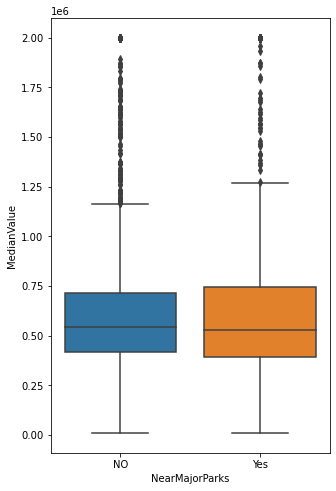

In [13]:
# set the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(5, 8)


# plot
sns.boxplot(data=df, x='NearMajorParks', y='MedianValue');

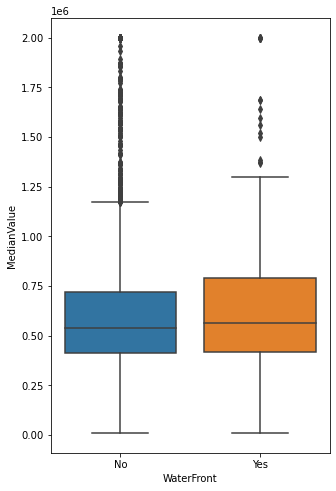

In [14]:
# set the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(5, 8)


# plot
sns.boxplot(data=df, x='WaterFront', y='MedianValue');

<AxesSubplot:xlabel='MedianValue', ylabel='Count'>

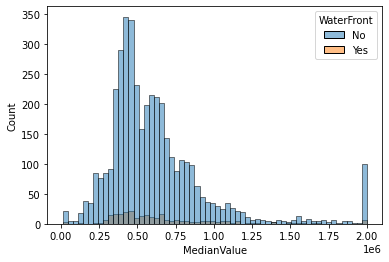

In [15]:
sns.histplot(data=df, x="MedianValue",bins=60,hue='WaterFront')

In [36]:
dfQueens = df.loc[df['boro_name']=='Queens']


<AxesSubplot:xlabel='MedianValue', ylabel='Count'>

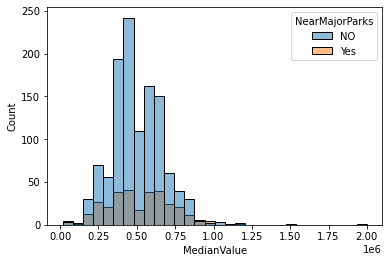

In [37]:
sns.histplot(data=dfQueens, x="MedianValue",bins=30,hue='NearMajorParks')

<AxesSubplot:xlabel='MedianValue', ylabel='Count'>

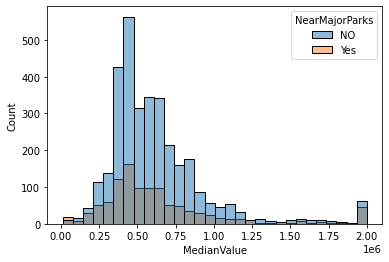

In [34]:
sns.histplot(data=df, x="MedianValue",bins=30,hue='NearMajorParks')

In [17]:
# use the unique values to split the dataframe and create two separate dataframes for each group.
df_group_1 = df.loc[df['WaterFront']=='Yes']
df_group_2 = df.loc[df['WaterFront']=='No']

In [18]:
df_group_1['MedianValue'].mean()

661936.0383141763

In [19]:
df_group_2['MedianValue'].mean()

618907.6015644097

In [ ]:
df_group_1.sample(3)

In [20]:
# now we need to use statmodels and pass each group (with a column) as an argument
# the test returns:
## 1) tstat : test statistic
## 2) pvalue of the t-test
## 3) degrees of freedom used in the t-test
sm.stats.ttest_ind(df_group_1['MedianValue'],df_group_2['MedianValue'])

(1.9304001639782817, 0.053622200475733385, 4350.0)

In [29]:
df['NearMajorParks'].unique()

array(['NO', 'Yes'], dtype=object)

In [31]:
# use the unique values to split the dataframe and create two separate dataframes for each group.
df_group_1 = df.loc[df['NearMajorParks']=='Yes']
df_group_2 = df.loc[df['NearMajorParks']=='NO']

In [32]:
# now we need to use statmodels and pass each group (with a column) as an argument
# the test returns:
## 1) tstat : test statistic
## 2) pvalue of the t-test
## 3) degrees of freedom used in the t-test
sm.stats.ttest_ind(df_group_1['MedianValue'],df_group_2['MedianValue'])

(2.208969005817115, 0.027228731029343572, 4350.0)